In [1]:
from keras.datasets import mnist

print(mnist)

# Collecting the data from the mnist
(train_X, train_y), (test_X, test_y) = mnist.load_data()

<module 'keras.datasets.mnist' from '/Users/giripragada/anaconda3/lib/python3.11/site-packages/keras/datasets/mnist/__init__.py'>


In [2]:

from keras.utils import to_categorical

# showing the training and tetsing dataset sizes
print("\n  dataset Size of traing values : ", len(train_X))
print("\n dataset Size of testing values  ",len(test_X))


# reshaping the images
train_X = train_X.reshape((60000, 28, 28, 1))
test_X = test_X.reshape((10000, 28, 28, 1))

# converting the images flating points numbers
train_X = train_X.astype('float32') / 255
test_X = test_X.astype('float32') / 255

# one-hot encoding is used to convert the labels to categorical
train_y = to_categorical(train_y, num_classes=10)
test_y = to_categorical(test_y, num_classes=10)



  dataset Size of traing values :  60000

 dataset Size of testing values   10000


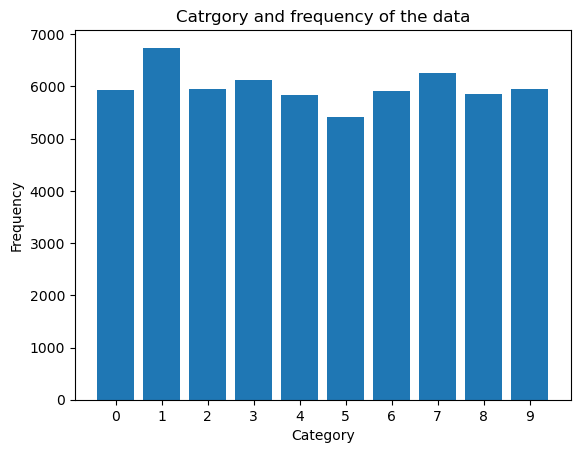

/Users/giripragada/anaconda3/lib/python3.11/site-packages/matplotlib/text.py:1279: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


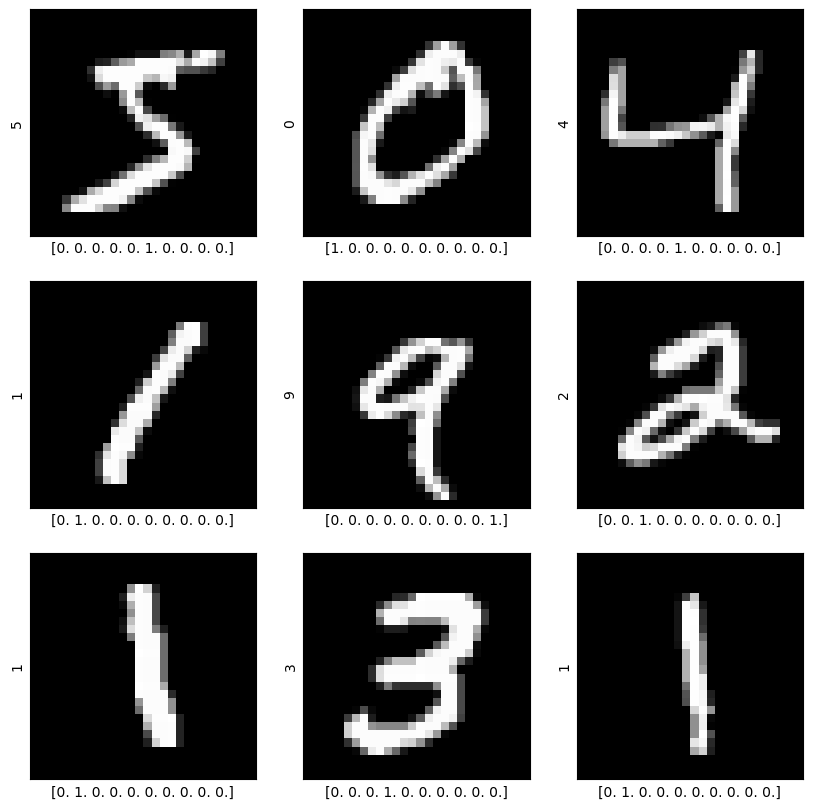

In [3]:
import numpy as np

import matplotlib.pyplot as plt

# The code below calculates histograms and displays the image
cateCount = np.bincount(np.argmax(train_y, axis=1))
cate = np.arange(10)
plt.bar(cate, cateCount)
plt.xticks(cate)


plt.ylabel('Frequency')

plt.xlabel('Category')

plt.title('Catrgory and frequency of the data')
plt.show()


# defining the figure size
plt.figure(figsize=(10, 10))

def return_argument_value(argList, value):
    if value in argList:

        return list(argList).index(value)
    else:
        return 11


for i in range(9):

    plt.subplot(3, 3, i+1)

    plt.imshow(np.squeeze(train_X[i]), cmap='gray')

    plt.yticks([])
    plt.xticks([])

    plt.xlabel(train_y[i])
    plt.ylabel(return_argument_value(train_y[i],1))
plt.show()


In [4]:
from keras.models import Sequential
from keras.layers import Dense, Flatten

# Model 1: Simple Neural Network

# Defining the simple neural network model
modelSNN = Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compiling the model
modelSNN.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Training SNN  model
SNNTrained = modelSNN.fit(train_X, train_y, epochs=10, batch_size=128, validation_split=0.2)

# Evaluating the model
testLoss, testAccSNN = modelSNN.evaluate(test_X, test_y)

print('Accuracy for SSN:', testAccSNN)

#accuracyValuesSNN = []
accuracyValuesSNN = SNNTrained.history['accuracy']

Epoch 1/10
375/375 [==============================] - 1s 1ms/step - loss: 0.3939 - accuracy: 0.8920 - val_loss: 0.2131 - val_accuracy: 0.9407
Epoch 2/10
375/375 [==============================] - 0s 734us/step - loss: 0.1852 - accuracy: 0.9466 - val_loss: 0.1581 - val_accuracy: 0.9560
Epoch 3/10
375/375 [==============================] - 0s 756us/step - loss: 0.1347 - accuracy: 0.9610 - val_loss: 0.1288 - val_accuracy: 0.9624
Epoch 4/10
375/375 [==============================] - 0s 782us/step - loss: 0.1035 - accuracy: 0.9708 - val_loss: 0.1136 - val_accuracy: 0.9668
Epoch 5/10
375/375 [==============================] - 0s 844us/step - loss: 0.0848 - accuracy: 0.9757 - val_loss: 0.1083 - val_accuracy: 0.9675
Epoch 6/10
375/375 [==============================] - 0s 771us/step - loss: 0.0704 - accuracy: 0.9800 - val_loss: 0.0976 - val_accuracy: 0.9707
Epoch 7/10
375/375 [==============================] - 0s 733us/step - loss: 0.0579 - accuracy: 0.9836 - val_loss: 0.0911 - val_accuracy: 0

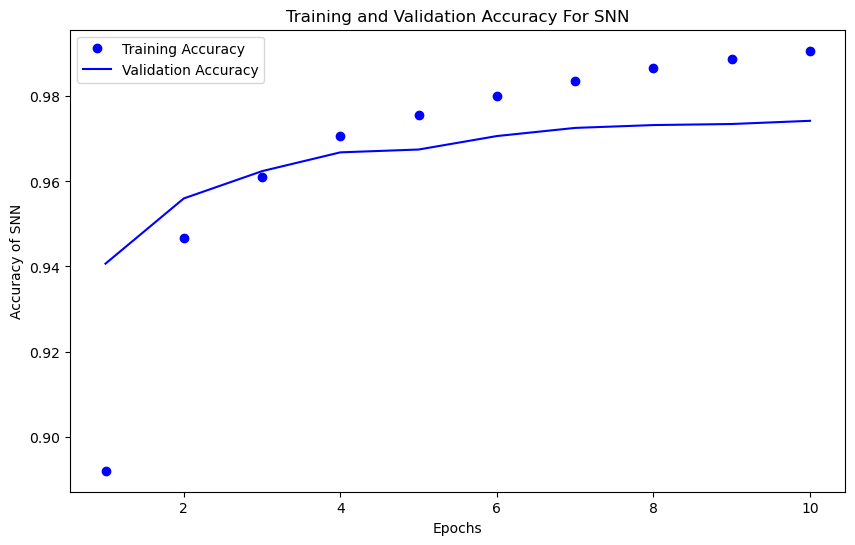

In [7]:
trainingAccuracy = SNNTrained.history['accuracy']
validationAccuracy = SNNTrained.history['val_accuracy']

# Creating a list of epochs for the x axis
epochs = range(1, len(trainingAccuracy) + 1)

# Plotting the training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(epochs, trainingAccuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, validationAccuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy For SNN')

plt.ylabel('Accuracy of SNN')
plt.xlabel('Epochs')

plt.legend()

plt.show()


In [8]:
# Model 2: Convolutional neural network

import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D



# Defining the CNN Model
modelCNN = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Compiling the CNN Model

modelCNN.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
x_train_cnn = np.expand_dims(train_X, axis=-1)
x_test_cnn = np.expand_dims(test_X, axis=-1)

# Training the CNN Model

CNN = modelCNN.fit(x_train_cnn, train_y, validation_data=(x_test_cnn, test_y), epochs=10, batch_size=128)

#Evaluating the CNN model

test_loss_CNN, test_acc_CNN = modelCNN.evaluate(x_test_cnn, test_y, verbose=0)
print('CNN Test Accuracy:', test_acc_CNN)



#accuracy_values_CNN = []
accuracy_values_CNN = CNN.history['accuracy']



Epoch 1/10
469/469 [==============================] - 24s 50ms/step - loss: 0.1555 - accuracy: 0.9539 - val_loss: 0.0625 - val_accuracy: 0.9803
Epoch 2/10
469/469 [==============================] - 24s 51ms/step - loss: 0.0451 - accuracy: 0.9862 - val_loss: 0.0403 - val_accuracy: 0.9864
Epoch 3/10
469/469 [==============================] - 24s 51ms/step - loss: 0.0281 - accuracy: 0.9916 - val_loss: 0.0327 - val_accuracy: 0.9889
Epoch 4/10
469/469 [==============================] - 25s 53ms/step - loss: 0.0184 - accuracy: 0.9942 - val_loss: 0.0349 - val_accuracy: 0.9885
Epoch 5/10
469/469 [==============================] - 109s 234ms/step - loss: 0.0139 - accuracy: 0.9955 - val_loss: 0.0390 - val_accuracy: 0.9867
Epoch 6/10
469/469 [==============================] - 25s 53ms/step - loss: 0.0103 - accuracy: 0.9966 - val_loss: 0.0313 - val_accuracy: 0.9913
Epoch 7/10
469/469 [==============================] - 25s 53ms/step - loss: 0.0080 - accuracy: 0.9973 - val_loss: 0.0413 - val_accurac

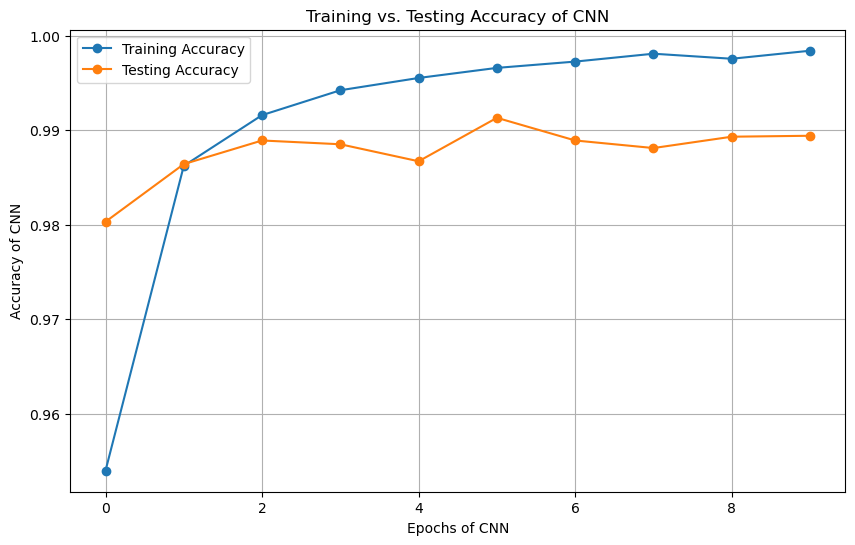

Bias: 0.001600027084350586
Variance: 0.008999943733215332


In [9]:
import matplotlib.pyplot as plt

# Plot training vs. testing accuracy
plt.figure(figsize=(10, 6))
plt.plot(CNN.history['accuracy'], label='Training Accuracy', marker='o', linestyle='-')
plt.plot(CNN.history['val_accuracy'], label='Testing Accuracy', marker='o', linestyle='-')
plt.title('Training vs. Testing Accuracy of CNN')
plt.xlabel('Epochs of CNN')
plt.ylabel('Accuracy of CNN')
plt.legend()
plt.grid(True)
plt.show()

# Calculate bias and variance
final_training_accuracy = CNN.history['accuracy'][-1]
final_testing_accuracy = CNN.history['val_accuracy'][-1]

biasCNN = 1 - final_training_accuracy
varianceCNN = final_training_accuracy - final_testing_accuracy

print('Bias:', biasCNN)
print('Variance:', varianceCNN)

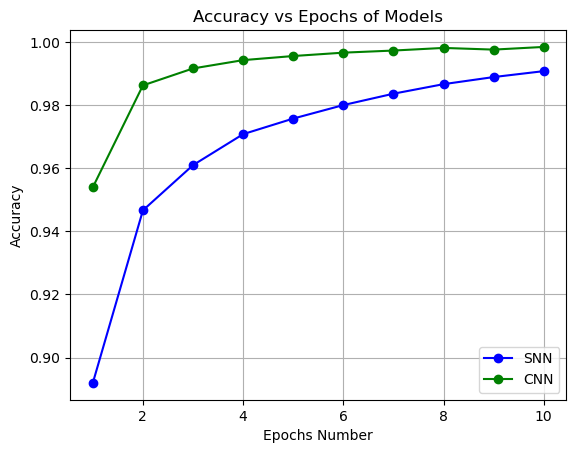

In [11]:
accuracy_values_CNN = []
for epoch in range(len(CNN.history['accuracy'])):
    accuracy_values_CNN.append(CNN.history['accuracy'][epoch])




# Plotting all three accuracy values on a single graph
plt.plot(np.arange(1, 11), accuracyValuesSNN, label='SNN', linestyle='-', marker='o', color='blue')
plt.plot(np.arange(1, 11), accuracy_values_CNN, label='CNN', linestyle='-', marker='o', color='green')

plt.ylabel('Accuracy')
plt.title('Accuracy vs Epochs of Models')
plt.xlabel('Epochs Number')

plt.legend()
plt.grid(True)
plt.show()

In [12]:
import pandas as pd

# Data for the table
data = {
    "S.No": [1, 2],
    "Neural Network Model": ["Simple Neural Network", "Convolutional Neural Network"],
    "Accuracy": [testAccSNN, test_acc_CNN]
}

# Creating a DataFrame
df = pd.DataFrame(data)

# Display the DataFrame as a table
print(df)


   S.No          Neural Network Model  Accuracy
0     1         Simple Neural Network    0.9762
1     2  Convolutional Neural Network    0.9894
